In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


trainingSensor = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")
validationSensor = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")

traingFood = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/3_관리 데이터/1_자포니카/2_사료 공급관리 데이터/food_supply_tb.csv")
validationFood = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/3_관리 데이터/1_자포니카/2_사료 공급관리 데이터/food_supply_tb.csv")

In [2]:
trainingSensor["mea_dt"] = trainingSensor["mea_dt"].apply(str)
trainingSensor["mea_dt"]  = trainingSensor["mea_dt"].str.slice(start=0, stop=15)
traingFood['feed_dt'] = pd.to_datetime(traingFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
traingFood["feed_dt"]=traingFood["feed_dt"].apply(str)
traingFood["feed_dt"]  = traingFood["feed_dt"].str.slice(start=0, stop=15)

validationSensor["mea_dt"] = validationSensor["mea_dt"].apply(str)
validationSensor["mea_dt"]  = validationSensor["mea_dt"].str.slice(start=0, stop=15)
validationFood['feed_dt'] = pd.to_datetime(validationFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
validationFood["feed_dt"] = validationFood["feed_dt"].apply(str)
validationFood["feed_dt"] = validationFood["feed_dt"].str.slice(start=0, stop=15)

In [3]:
traingFood.head()

,farm_id,tank_id,feed_dt,feed_code,feed_quantity,water_quantity,add_code,add_quantity,add_code2,add_quantity2,add_code3,add_quantity3,add_code4,add_quantity4,add_code5,add_quantity5,reg_dt
0,1,1,2021-07-21 04:3,s2-g,6.2,9.3,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
1,1,1,2021-07-21 16:3,s2-g,6.2,9.3,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
2,1,1,2021-07-22 04:3,s2-g,6.2,9.3,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
3,1,1,2021-07-22 16:3,s2-g,6.2,9.3,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
4,1,1,2021-07-23 04:3,s2-g,6.2,9.3,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19


In [20]:
#traing = pd.merge(left = trainingSensor, right = traingFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
traing = pd.merge(left = trainingSensor, right = traingFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#traing = traing.dropna(axis=0)
traing.head()

,Unnamed: 0,farm_id,tank_id,mea_dt,do_mg,do_temp,ph,orp,co2_mg,air_oxy,...,add_quantity,add_code2,add_quantity2,add_code3,add_quantity3,add_code4,add_quantity4,add_code5,add_quantity5,reg_dt
0,0,1,1,2021-07-15 19:0,8.8,30.3,5.28,160.0,14.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,2021-07-15 19:0,7.3,32.2,5.23,334.6,0.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,2021-07-15 19:0,7.3,32.0,5.97,325.6,0.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,4,2021-07-15 19:0,6.9,30.8,5.71,135.0,20.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,2021-07-15 19:0,10.4,28.4,4.54,135.0,18.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#validation = pd.merge(left = validationSensor, right = validationFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
validation = pd.merge(left = validationSensor, right = validationFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#validation = validation.dropna(axis=0)
validation.head()

,Unnamed: 0,farm_id,tank_id,mea_dt,do_mg,do_temp,ph,orp,co2_mg,air_oxy,...,add_quantity,add_code2,add_quantity2,add_code3,add_quantity3,add_code4,add_quantity4,add_code5,add_quantity5,reg_dt
0,0,1,1,2021-07-15 19:0,8.8,30.3,5.28,160.0,14.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,2021-07-15 19:0,7.3,32.2,5.23,334.6,0.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,2021-07-15 19:0,7.3,32.0,5.97,325.6,0.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,4,2021-07-15 19:0,6.9,30.8,5.71,135.0,20.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,2021-07-15 19:0,10.4,28.4,4.54,135.0,18.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
traing = traing[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
validation = validation[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
traing = traing.fillna(0)
validation = validation.fillna(0)

In [23]:
from sklearn.model_selection import train_test_split
#x = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y = traing[['do_mg']]
#x_train = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_train = traing[['do_mg']]
#x_test = validation[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_test = validation[['do_mg']]
x_train = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_train = traing[['do_mg']]
x_test = validation[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_test = validation[['do_mg']]
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [24]:
# shape확인
nCar = x_train.shape[0] # 데이터 개수
nVar = x_train.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_train.shape[0] # 데이터 개수
nVar = y_train.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

# shape확인
nCar = x_test.shape[0] # 데이터 개수
nVar = x_test.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_test.shape[0] # 데이터 개수
nVar = y_test.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1113748 nVar: 8
nCar: 1113748 nVar: 1
nCar: 1113748 nVar: 8
nCar: 1113748 nVar: 1


In [25]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=20, min_samples_split=20,n_estimators=50)
rf_run.fit(x_train, y_train.values.ravel())

#의사결정
dt_model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5)
dt_model.fit(x_train, y_train.values.ravel())

#그래디언트
gb_model = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5, learning_rate= 0.1)
gb_model.fit(x_train, y_train.values.ravel())

GradientBoostingRegressor(max_depth=5, min_samples_leaf=20,
                          min_samples_split=20, random_state=0)

In [26]:
# train rmse
rf_train_predict = rf_run.predict(x_train)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_train_predict, y_train))) )
 
# validation rmse
rf_valid_predict = rf_run.predict(x_test)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_valid_predict, y_test))) )

# train rmse
dt_train_predict = dt_model.predict(x_train)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_train_predict, y_train))) )
 
# validation rmse
dt_valid_predict = dt_model.predict(x_test)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_valid_predict, y_test))) )

# train rmse
gb_train_predict = gb_model.predict(x_train)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_train_predict, y_train))) )
 
# validation rmse
gb_valid_predict = gb_model.predict(x_test)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_valid_predict, y_test))) )
 
# test rmse
#RUN_T= RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
#a11 = RUN_T.iloc[:, :-1]
#b11 = RUN_T.iloc[:, -1]
#rf_run_predict = rf_run.predict(a11)
#print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, b11))) )

rf_RMSE':1.632591664272222
rf_RMSE':1.632591664272222
dt_RMSE':1.6454625819278696
dt_RMSE':1.6454625819278696
gb_RMSE':1.3523448237911797
gb_RMSE':1.3523448237911797


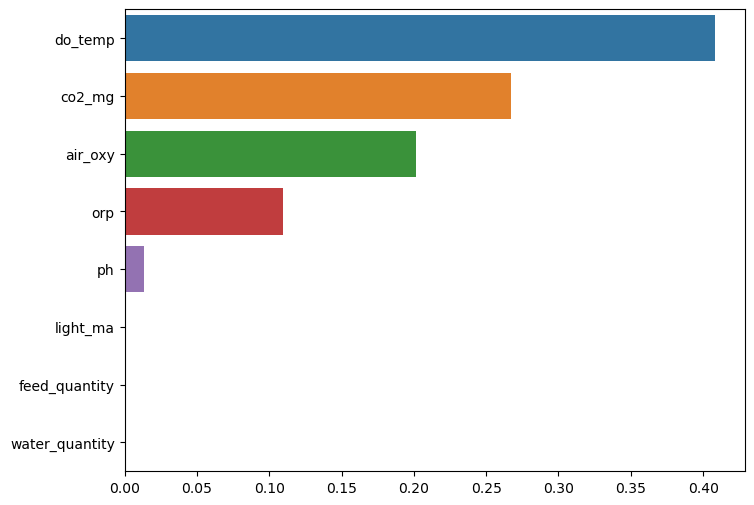

In [27]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

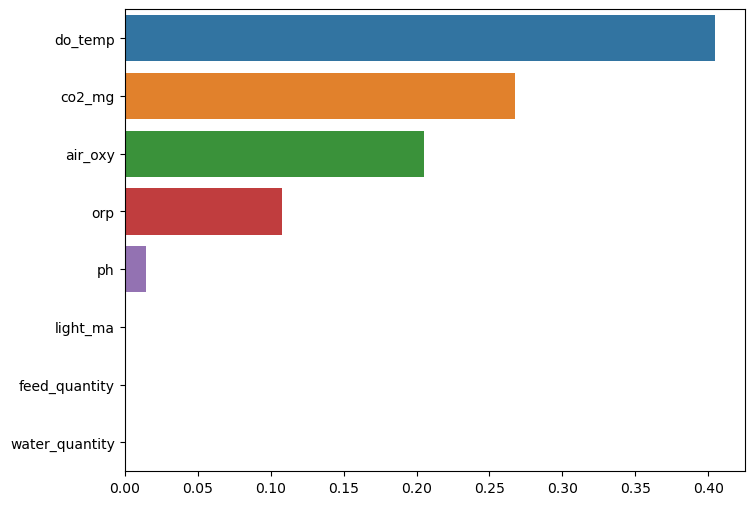

In [28]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

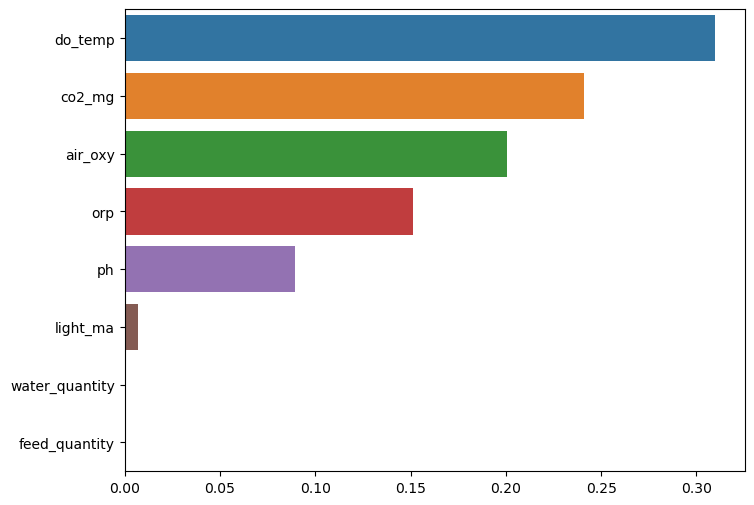

In [29]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

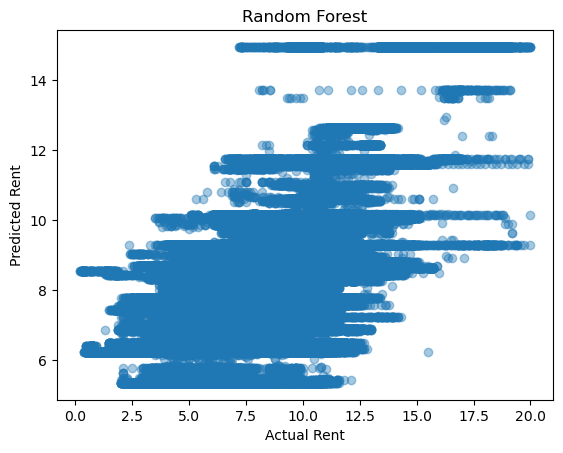

In [30]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, rf_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Random Forest")
plt.show()

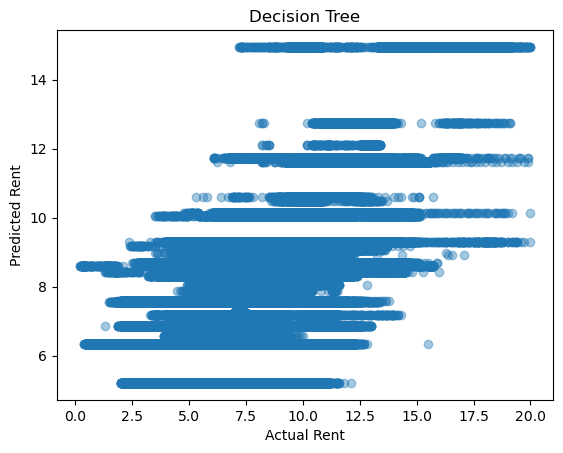

In [31]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, dt_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Decision Tree")
plt.show()

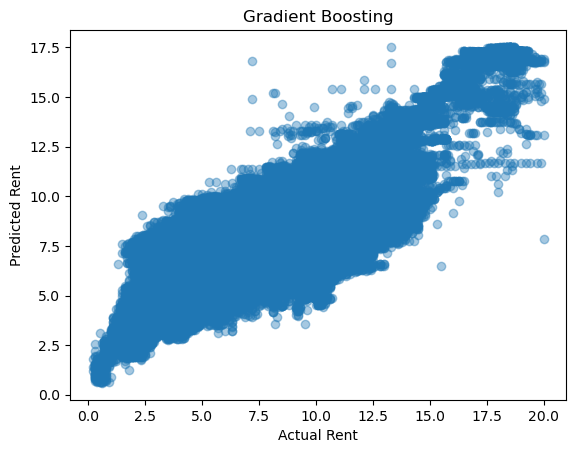

In [32]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, gb_valid_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Gradient Boosting")
plt.show()

In [33]:
print(gb_model.score(x_train, y_train))

print(gb_model.score(x_test, y_test))

0.5924866629553458
0.5924866629553458


In [4]:
trainingSensor8 = trainingSensor[(trainingSensor['mea_dt'].str.contains('2021-07-21'))&(trainingSensor['tank_id']==1)]
trainingSensor8 = trainingSensor8.set_index('mea_dt')

<Axes: xlabel='mea_dt'>

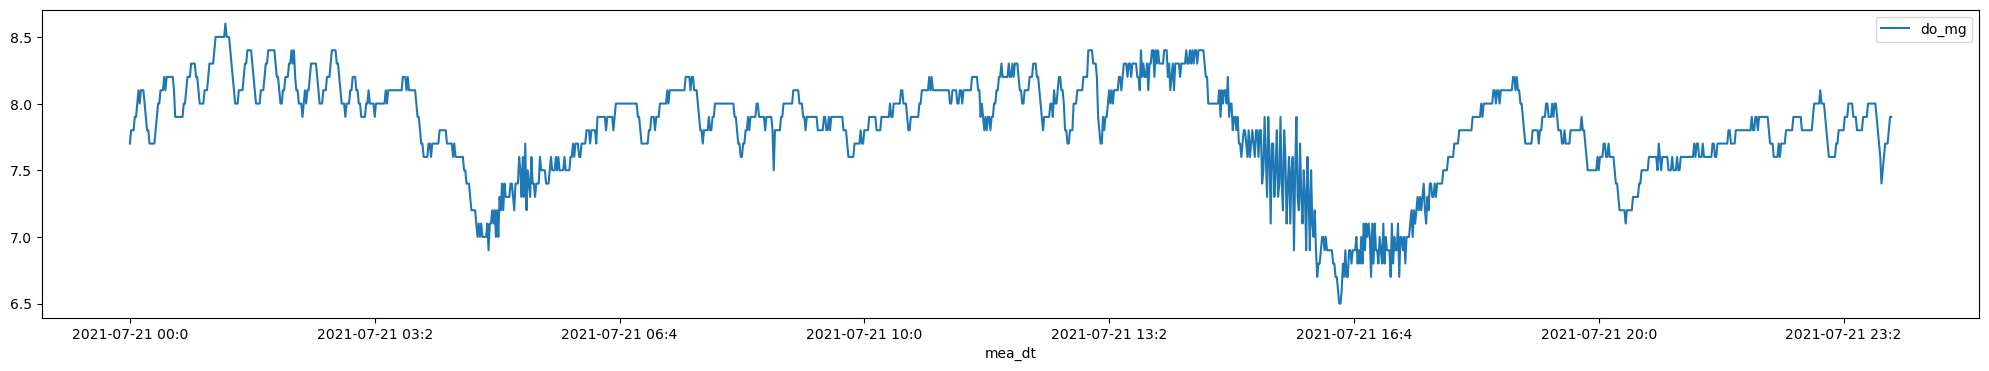

In [5]:
%matplotlib inline
#trainingSensor8.plot(y=['do_mg'], x=['mea_dt'])
trainingSensor8.plot(y=['do_mg'],figsize=(25,4))

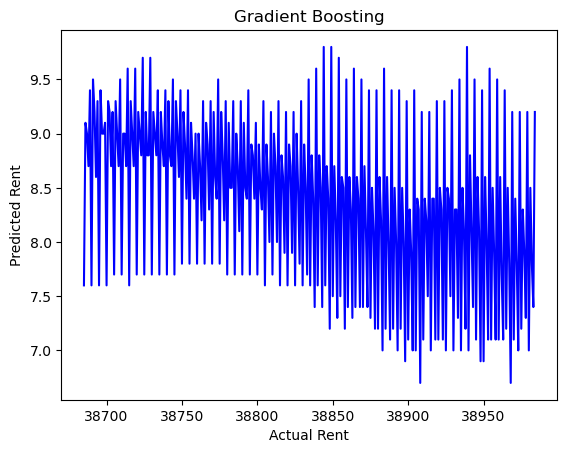

In [56]:
#import matplotlib.pyplot as plt
mea_dt = trainingSensor8[['mea_dt']]
do_mg = trainingSensor8[['do_mg']]
plt.plot(do_mg, 'b-')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Gradient Boosting")
plt.show()